<a href="https://colab.research.google.com/github/marreapato/ML_Project_Taxi_Trip_Duration/blob/main/Projeto_Lucas_Rabelo_AM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/machine-learning

!ls




/content/gdrive/MyDrive/machine-learning
Failing_Equipment_Exercise.xlsx  test.csv  train.csv


# Extração e Leitura dos Dados

In [4]:
# For visualizations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


# Análise Inicial

Alguns arrendodamentos foram feitos na análise, utilizando a regra geral de arredondamento para elhor interpretabilidade dos resultados.

No conjunto de treinamento há uma média de aproximadente 2 passageiros por viagem, sendo que até 50% das viagens contém apenas um passageiro, além disso a duração média das viagens é de 959 segundos (ou de aproximadamente 16 minutos)

In [6]:
train['trip_duration'].mean()/60

15.991537882672764

In [7]:
train.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


No  conjunto de testes a média de passageiros por viagens também foi de aproximadamente 2 passageiros e até 50% das viagens continham apenas um passageiro

In [8]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


Além disso nem no conjunto de teste, nem no conjunto de treinamento há a presença de valores faltantes (missing data)

In [9]:
train.isnull().values.any()

False

In [10]:
test.isnull().values.any()

False

<ipython-input-11-d1b9e1d33f42>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = train.groupby('store_and_fwd_flag').mean()


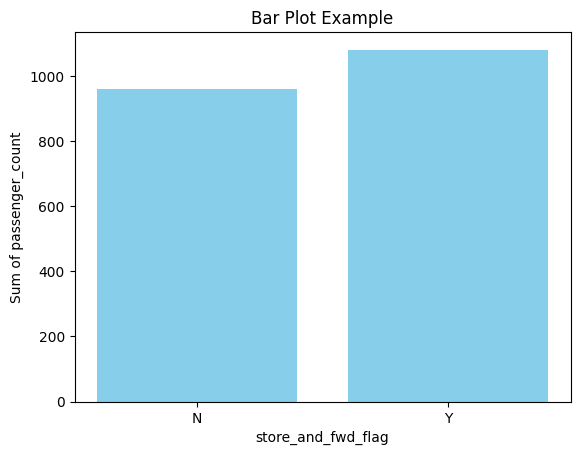

In [11]:
# Group by 'Category' and sum the values
grouped_df = train.groupby('store_and_fwd_flag').mean()
grouped_df
# Resetting the index to make 'store_and_fwd_flag' a regular column
grouped_df = grouped_df.reset_index()

# Creating a bar plot
plt.bar(grouped_df['store_and_fwd_flag'],grouped_df['trip_duration'], color='skyblue')


# Adding labels and title
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Sum of passenger_count')
plt.title('Bar Plot Example')

# Display the plot
plt.show()

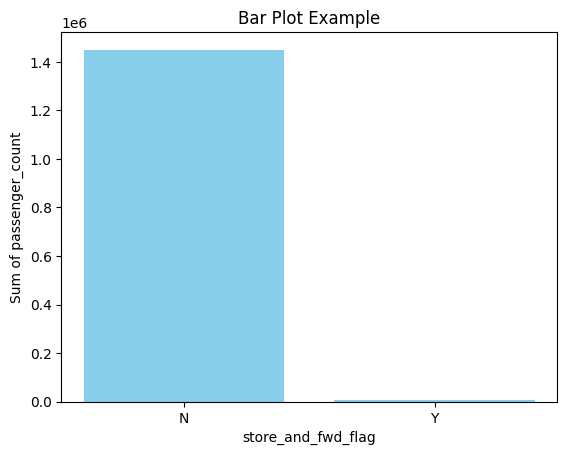

In [12]:
# Group by 'Category' and sum the values
grouped_df = train.groupby('store_and_fwd_flag').size().reset_index(name='counts')
grouped_df

# Resetting the index to make 'store_and_fwd_flag' a regular column
grouped_df = grouped_df.reset_index()

grouped_df

# Creating a bar plot
plt.bar(grouped_df['store_and_fwd_flag'],grouped_df['counts'], color='skyblue')


# Adding labels and title
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Sum of passenger_count')
plt.title('Bar Plot Example')

# Display the plot
plt.show()




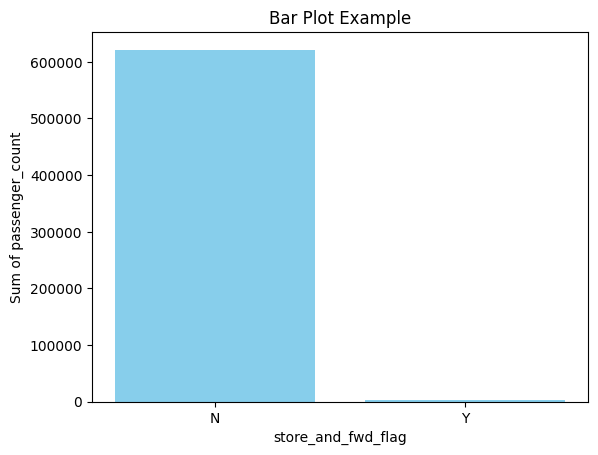

In [13]:
# Group by 'Category' and sum the values
grouped_df = test.groupby('store_and_fwd_flag').size().reset_index(name='counts')
grouped_df

# Resetting the index to make 'store_and_fwd_flag' a regular column
grouped_df = grouped_df.reset_index()

grouped_df

# Creating a bar plot
plt.bar(grouped_df['store_and_fwd_flag'],grouped_df['counts'], color='skyblue')


# Adding labels and title
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Sum of passenger_count')
plt.title('Bar Plot Example')

# Display the plot
plt.show()




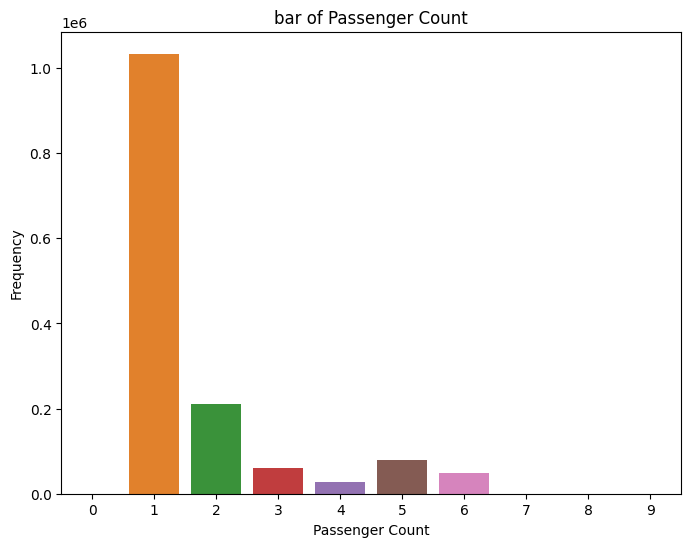

In [14]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='passenger_count', data=train[['passenger_count']])

# Set plot labels and title
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('bar of Passenger Count')

# Show the plot
plt.show()

# Pré-Processamento

A formula de Haversine (https://community.esri.com/t5/coordinate-reference-systems-blog/distance-on-a-sphere-the-haversine-formula/ba-p/902128), foi utilizada para capturar a distancia em kilomentros entre a latitude e longitude de origem e a de destino:

In [15]:
!pip install haversine

In [16]:
import haversine as hs #https://stackoverflow.com/questions/38623122/finding-the-distance-between-several-points-lat-long

train['start_coord'] = list(zip(train.pickup_latitude, train.pickup_longitude))
train['end_coord'] = list(zip(train.dropoff_latitude, train.dropoff_longitude))

train["Haversine_dist"] = train.apply(lambda x: hs.haversine(x["start_coord"], x["end_coord"]), axis=1)

test['start_coord'] = list(zip(test.pickup_latitude, test.pickup_longitude))
test['end_coord'] = list(zip(test.dropoff_latitude, test.dropoff_longitude))

test["Haversine_dist"] = test.apply(lambda x: hs.haversine(x["start_coord"], x["end_coord"]), axis=1)


train["Haversine_dist"]

0          1.498523
1          1.805510
2          6.385107
3          1.485500
4          1.188590
             ...   
1458639    1.225082
1458640    6.049844
1458641    7.824617
1458642    1.092565
1458643    1.134044
Name: Haversine_dist, Length: 1458644, dtype: float64

Dias da semana, hora do dia, mês

<ipython-input-17-bbe0ca215620>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_weekday = train.groupby('weekday').mean().reset_index()
<ipython-input-17-bbe0ca215620>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_hour = train.groupby('hour_of_day').mean().reset_index()


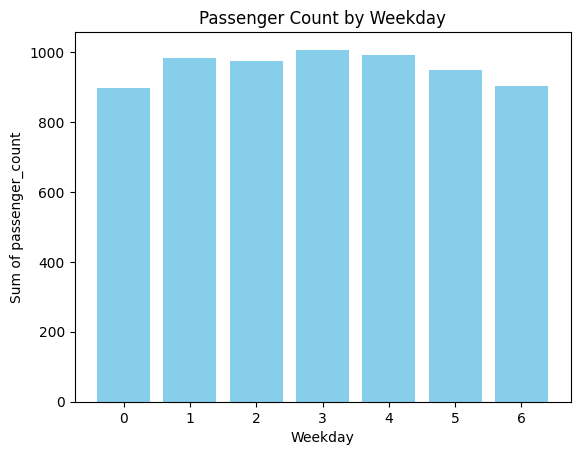

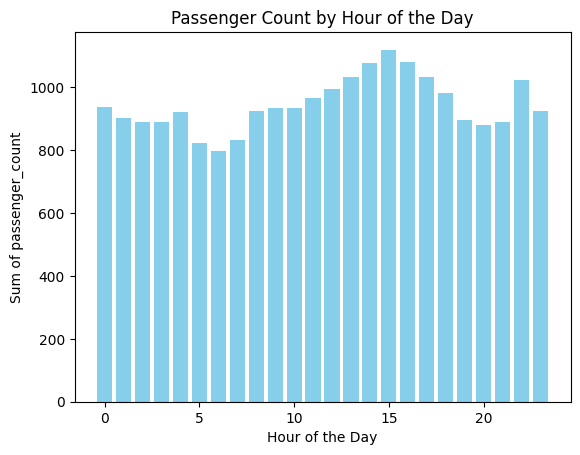

In [17]:
# Convert 'pickup_datetime' to datetime type
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

# Extract weekday and hour of the day
train['weekday'] = train['pickup_datetime'].dt.weekday
train['hour_of_day'] = train['pickup_datetime'].dt.hour

# Group by 'weekday' and sum the values
grouped_weekday = train.groupby('weekday').mean().reset_index()

# Group by 'hour_of_day' and sum the values
grouped_hour = train.groupby('hour_of_day').mean().reset_index()

# Creating a bar plot for weekday
plt.bar(grouped_weekday['weekday'], grouped_weekday['trip_duration'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Sum of passenger_count')
plt.title('Passenger Count by Weekday')
plt.show()

# Creating a bar plot for hour of the day
plt.bar(grouped_hour['hour_of_day'], grouped_hour['trip_duration'], color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Sum of passenger_count')
plt.title('Passenger Count by Hour of the Day')
plt.show()

In [18]:
!pip install holidays

In [19]:
min(train['pickup_datetime'].dt.year)-max(train['pickup_datetime'].dt.year)

0

            pickup_datetime  is_holiday
0       2016-03-14 17:24:55       False
1       2016-06-12 00:43:35       False
2       2016-01-19 11:35:24       False
3       2016-04-06 19:32:31       False
4       2016-03-26 13:30:55       False
...                     ...         ...
1458639 2016-04-08 13:31:04       False
1458640 2016-01-10 07:35:15       False
1458641 2016-04-22 06:57:41       False
1458642 2016-01-05 15:56:26       False
1458643 2016-04-05 14:44:25       False

[1458644 rows x 2 columns]


<ipython-input-20-47e1e185275d>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_hour = train.groupby('is_holiday').mean().reset_index()


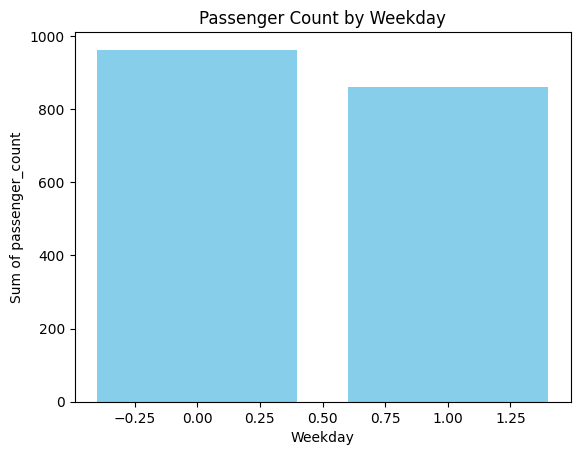

In [20]:
import holidays

# Assuming 'train' is your DataFrame

# Convert 'pickup_datetime' to datetime type
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

# Create a column to indicate if the date is a holiday
us_holidays = holidays.UnitedStates(years=2016,prov='NY')  # You can choose the country accordingly
train['is_holiday'] = train['pickup_datetime'].dt.date.apply(lambda x: x in us_holidays)

# Display the DataFrame with the new 'is_holiday' column
print(train[['pickup_datetime', 'is_holiday']])

# Group by 'hour_of_day' and sum the values
grouped_hour = train.groupby('is_holiday').mean().reset_index()

# Creating a bar plot for weekday
plt.bar(grouped_hour['is_holiday'], grouped_hour['trip_duration'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Sum of passenger_count')
plt.title('Passenger Count by Weekday')
plt.show()


<ipython-input-21-1b376110c3e5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_weekday = train.groupby('pickup_month').mean().reset_index()


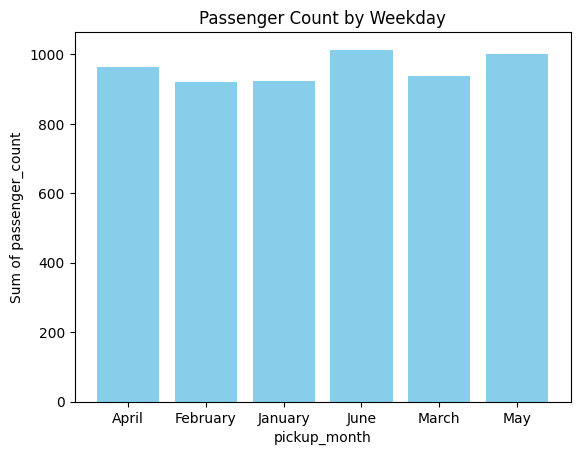

In [21]:
train['pickup_month']=train['pickup_datetime'].dt.month_name()
# Group by 'weekday' and sum the values
grouped_weekday = train.groupby('pickup_month').mean().reset_index()

# Creating a bar plot for weekday
plt.bar(grouped_weekday['pickup_month'], grouped_weekday['trip_duration'], color='skyblue')
plt.xlabel('pickup_month')
plt.ylabel('Sum of passenger_count')
plt.title('Passenger Count by Weekday')
plt.show()

### Alterações no conjunto de teste

In [22]:
# Convert 'pickup_datetime' to datetime type
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

# Create a column to indicate if the date is a holiday
us_holidays = holidays.UnitedStates(years=2016,prov='NY')  # You can choose the country accordingly
test['is_holiday'] = test['pickup_datetime'].dt.date.apply(lambda x: x in us_holidays)

# Display the DataFrame with the new 'is_holiday' column
print(test[['pickup_datetime', 'is_holiday']])


           pickup_datetime  is_holiday
0      2016-06-30 23:59:58       False
1      2016-06-30 23:59:53       False
2      2016-06-30 23:59:47       False
3      2016-06-30 23:59:41       False
4      2016-06-30 23:59:33       False
...                    ...         ...
625129 2016-01-01 00:02:52        True
625130 2016-01-01 00:01:52        True
625131 2016-01-01 00:01:24        True
625132 2016-01-01 00:00:28        True
625133 2016-01-01 00:00:22        True

[625134 rows x 2 columns]


In [23]:
# Convert 'pickup_datetime' to datetime type
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

# Extract weekday and hour of the day
test['weekday'] = test['pickup_datetime'].dt.weekday
test['hour_of_day'] = test['pickup_datetime'].dt.hour
test['pickup_month']=test['pickup_datetime'].dt.month_name()

test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,start_coord,end_coord,Haversine_dist,is_holiday,weekday,hour_of_day,pickup_month
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,"(40.73202896118164, -73.98812866210938)","(40.7566795349121, -73.99017333984375)",2.746430,False,3,23,June
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,"(40.67999267578125, -73.96420288085938)","(40.65540313720703, -73.95980834960938)",2.759243,False,3,23,June
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,"(40.73758316040039, -73.9974365234375)","(40.729522705078125, -73.9861602783203)",1.306157,False,3,23,June
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,"(40.77190017700195, -73.95606994628906)","(40.73046875, -73.98642730712889)",5.269095,False,3,23,June
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,"(40.761474609375, -73.97021484375)","(40.755889892578125, -73.96150970458984)",0.960843,False,3,23,June


In [24]:
train['vendor_id'].unique()

array([2, 1])

In [25]:
test['vendor_id'].unique()

array([1, 2])

### Variáveis Dummy

In [26]:
vendor_train = pd.get_dummies(train['vendor_id'], prefix='vi', prefix_sep='_')
vendor_test = pd.get_dummies(test['vendor_id'], prefix='vi', prefix_sep='_')
store_and_fwd_flag_train = pd.get_dummies(train['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
store_and_fwd_flag_test = pd.get_dummies(test['store_and_fwd_flag'], prefix='sf', prefix_sep='_')

month_train = pd.get_dummies(train['pickup_month'], prefix='m', prefix_sep='_')
month_test = pd.get_dummies(test['pickup_month'], prefix='m', prefix_sep='_')
hour_train = pd.get_dummies(train['hour_of_day'], prefix='h', prefix_sep='_')
hour_test = pd.get_dummies(test['hour_of_day'], prefix='h', prefix_sep='_')
dow_train = pd.get_dummies(train['weekday'], prefix='dow', prefix_sep='_')
dow_test = pd.get_dummies(test['weekday'], prefix='dow', prefix_sep='_')

In [27]:
vendor_train


,vi_1,vi_2
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
1458639,0,1
1458640,1,0
1458641,0,1
1458642,1,0


In [28]:
train = train.drop(['id','vendor_id','store_and_fwd_flag','dropoff_datetime','pickup_datetime',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','start_coord','end_coord','pickup_month','weekday','hour_of_day'],axis = 1)
Test_id = test['id']
test = test.drop(['id','vendor_id','store_and_fwd_flag','pickup_datetime',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','start_coord','end_coord','pickup_month','weekday','hour_of_day'], axis = 1)


In [29]:
train

,passenger_count,trip_duration,Haversine_dist,is_holiday
0,1,455,1.498523,False
1,1,663,1.805510,False
2,1,2124,6.385107,False
3,1,429,1.485500,False
4,1,435,1.188590,False
...,...,...,...,...
1458639,4,778,1.225082,False
1458640,1,655,6.049844,False
1458641,1,764,7.824617,False
1458642,1,373,1.092565,False


In [30]:
Train_Master = pd.concat([train,
                          vendor_train,
                          store_and_fwd_flag_train,
                         month_train,
                          hour_train,
                          dow_train
                         ], axis=1)

Test_Master = pd.concat([test,
                          vendor_test,
                          store_and_fwd_flag_test,
                         month_test,
                          hour_test,
                          dow_test
                         ], axis=1)

# Modelos

In [40]:
from sklearn.model_selection import train_test_split
Train, Validation = train_test_split(Train_Master[0:100000], test_size = 0.2)

X_train = Train.drop(['trip_duration'], axis=1)
Y_train = np.log(Train["trip_duration"])
X_test = Validation.drop(['trip_duration'], axis=1)
Y_test = np.log(Validation["trip_duration"])

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

In [41]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)
dtest = xgb.DMatrix(Test_Master)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

In [42]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9,
            'max_depth': 6,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2,
      maximize=False, verbose_eval=1)
print('Modeling RMSLE %.5f' % model.best_score)

[0]	train-rmse:0.58624	valid-rmse:0.58966
[1]	train-rmse:0.58253	valid-rmse:0.58621
[2]	train-rmse:0.51285	valid-rmse:0.51462
[3]	train-rmse:0.49134	valid-rmse:0.49230


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:01:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:01:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	train-rmse:0.48205	valid-rmse:0.48339
[5]	train-rmse:0.47784	valid-rmse:0.47983
[6]	train-rmse:0.47457	valid-rmse:0.47730
[7]	train-rmse:0.47044	valid-rmse:0.47434
[8]	train-rmse:0.46764	valid-rmse:0.47221
[9]	train-rmse:0.46572	valid-rmse:0.47108
Modeling RMSLE 0.47108


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

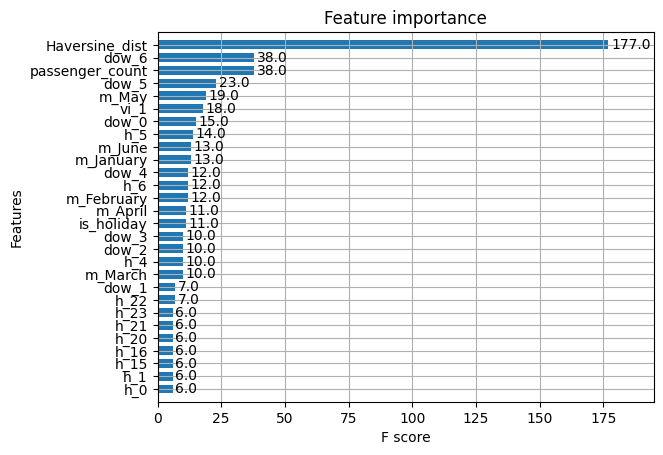

In [43]:
xgb.plot_importance(model, max_num_features=28, height=0.7)


In [44]:
pred = model.predict(dtest)
pred = np.exp(pred)# - 1
submission = pd.concat([Test_id, pd.DataFrame(pred)], axis=1)
submission.columns = ['id','trip_duration']
submission['trip_duration'] = submission.apply(lambda x : 1 if (x['trip_duration'] <= 0) else x['trip_duration'], axis = 1)


In [45]:
submission

,id,trip_duration
0,id3004672,712.483398
1,id3505355,768.732422
2,id1217141,402.864014
3,id2150126,1241.463013
4,id1598245,296.768158
...,...,...
625129,id3008929,290.738525
625130,id3700764,1076.682007
625131,id2568735,1308.784546
625132,id1384355,1879.323608
